In [5]:
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [14]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = 'dataset_filiacoes.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

# Aplica a regressão logística para um conjunto de varíaveis determinadas
def logistic_regression(x_independents: DataFrame, y_dependent: DataFrame, balanced=False):

    # 40% dos dados serão para teste e 60% para treino
    x_train, x_test, y_train, y_test = train_test_split(x_independents, y_dependent, test_size=0.4, random_state=42)

    model = LogisticRegression(class_weight= 'balanced' if balanced else None)
    model.fit(x_train, y_train)

    # Fazendo predições
    y_pred = model.predict(x_test)

    # Relatório de Classificação
    print(f'Balanced: {balanced}')
    print(y_dependent.value_counts())
    print("Acurácia:", accuracy_score(y_test, y_pred))
    class_report = classification_report(y_test, y_pred)
    print("Report:\n", class_report)

    # Gerando e plotando a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Previsão")
    plt.ylabel("Valor Real")
    plt.title("Matriz de Confusão")
    plt.show()

## Análise de correlação

* ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

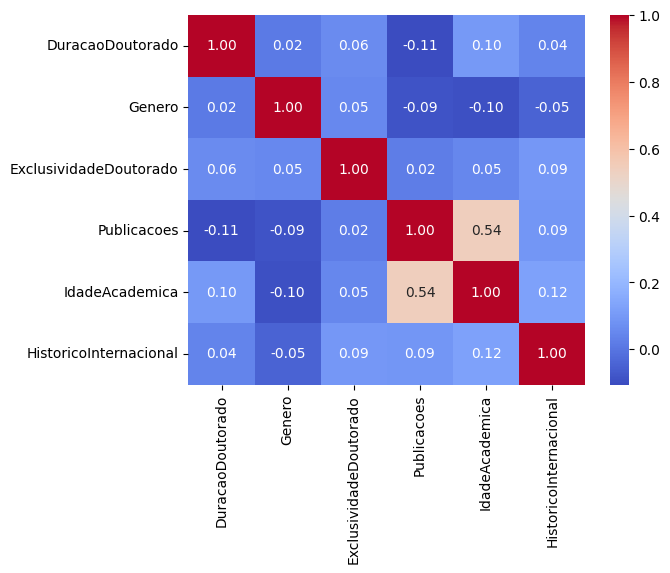

In [20]:
correlation_matrix = dataset.drop(columns=['IDLattes']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# Regressão logística

Estimar a probabilidade de um perquisador possuir uma filiação internacional, com base nas seguintes variáveis disponíveis:

* DuracaoDoutorado
* Genero 
* Publicacoes 
* IdadeAcademica
* ExclusividadeDoutorado

Balanced: True
HistoricoInternacional
0    101940
1     19700
Name: count, dtype: int64
Acurácia: 0.5874506741203551
Report:
               precision    recall  f1-score   support

           0       0.88      0.59      0.70     40785
           1       0.22      0.59      0.32      7871

    accuracy                           0.59     48656
   macro avg       0.55      0.59      0.51     48656
weighted avg       0.77      0.59      0.64     48656



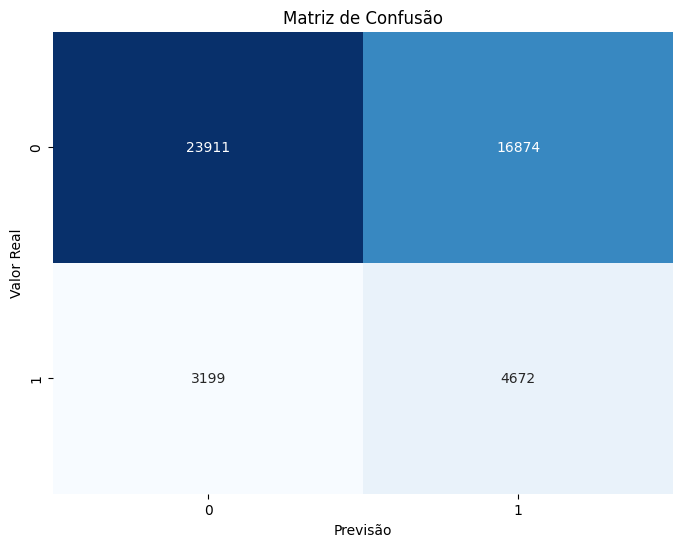

Balanced: False
HistoricoInternacional
0    101940
1     19700
Name: count, dtype: int64
Acurácia: 0.8379233804669517
Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91     40785
           1       0.31      0.00      0.00      7871

    accuracy                           0.84     48656
   macro avg       0.57      0.50      0.46     48656
weighted avg       0.75      0.84      0.76     48656



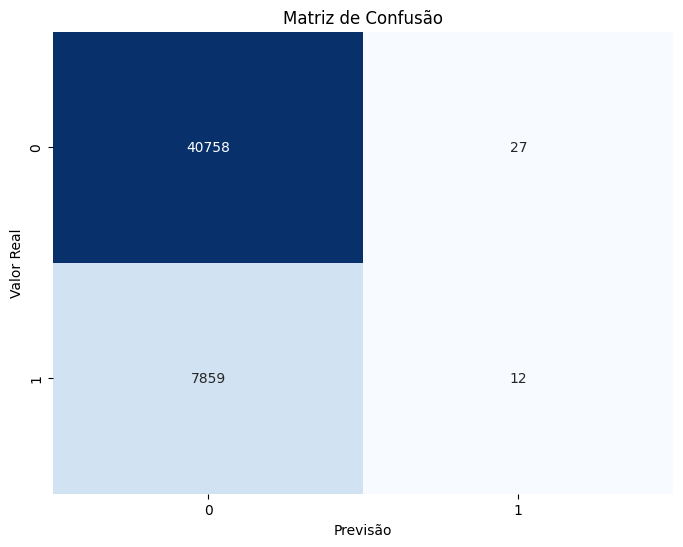

In [15]:
# Variáveis independentes
x_independents = dataset[['DuracaoDoutorado',
             'Genero',
             'ExclusividadeDoutorado',
             'Publicacoes',
             'IdadeAcademica']]

# Variável dependente
y_dependent = dataset['HistoricoInternacional']

logistic_regression(x_independents, y_dependent, balanced=True)
logistic_regression(x_independents, y_dependent)

Estimando a predição de **HistoricoInternacional** com a remoção de IdadeAcademica ou Publicacoes.

Removido variável IdadeAcademica
Balanced: True
HistoricoInternacional
0    101940
1     19700
Name: count, dtype: int64
Acurácia: 0.585518743834265
Report:
               precision    recall  f1-score   support

           0       0.88      0.58      0.70     40785
           1       0.22      0.59      0.32      7871

    accuracy                           0.59     48656
   macro avg       0.55      0.59      0.51     48656
weighted avg       0.77      0.59      0.64     48656



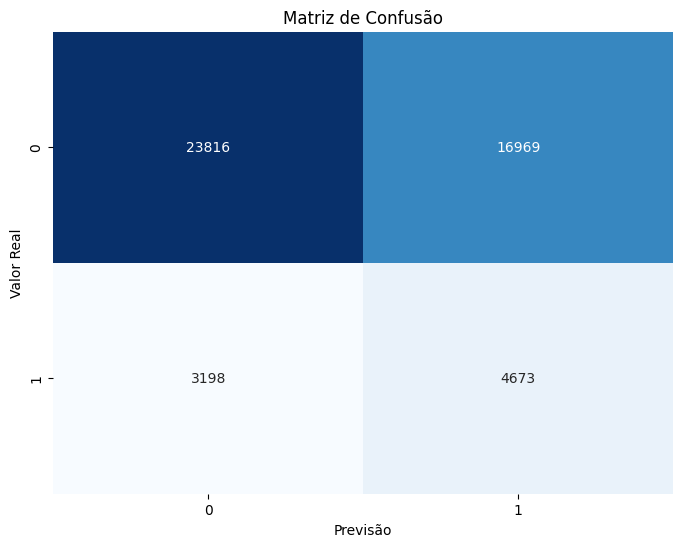

Removido variável Publicacoes
Balanced: True
HistoricoInternacional
0    101940
1     19700
Name: count, dtype: int64
Acurácia: 0.5660555738243999
Report:
               precision    recall  f1-score   support

           0       0.88      0.56      0.68     40785
           1       0.21      0.61      0.31      7871

    accuracy                           0.57     48656
   macro avg       0.55      0.58      0.50     48656
weighted avg       0.77      0.57      0.62     48656



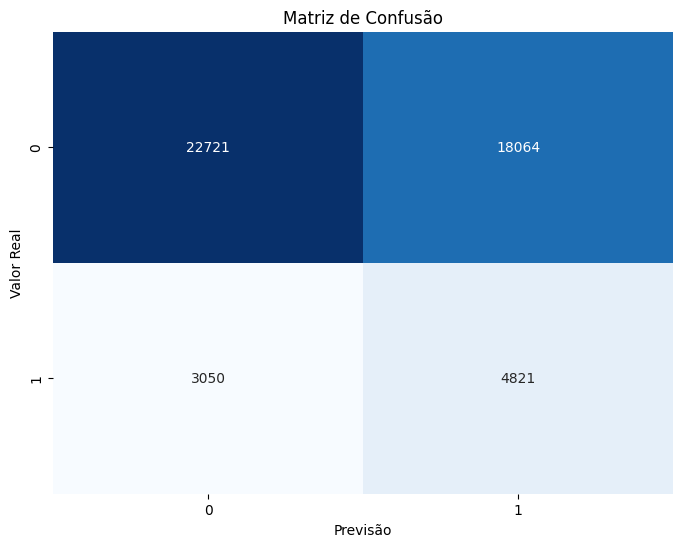

In [17]:
# Variáveis independentes
x_independents = dataset[['DuracaoDoutorado',
             'Genero',
             'ExclusividadeDoutorado',
             'IdadeAcademica']]

# Variável dependente
y_dependent = dataset['HistoricoInternacional']

print('Removido variável IdadeAcademica')
logistic_regression(x_independents, y_dependent, balanced=True)

x_independents = dataset[['DuracaoDoutorado',
             'Genero',
             'ExclusividadeDoutorado',
             'Publicacoes']]

# Variável dependente
y_dependent = dataset['HistoricoInternacional']

print('Removido variável Publicacoes')
logistic_regression(x_independents, y_dependent, balanced=True)


## Estimando gênero

Estimar o gênero do pesquisador(a) com base nas seguintes variáveis disponíveis:
* DuracaoDoutorado
* ExclusividadeDoutorado
* Publicacoes
* IdadeAcademica
* HistoricoInternacional

Balanced: False
Genero
0.0    61953
1.0    59687
Name: count, dtype: int64
Acurácia: 0.5396251233146991
Report:
               precision    recall  f1-score   support

         0.0       0.56      0.50      0.53     24923
         1.0       0.53      0.58      0.55     23733

    accuracy                           0.54     48656
   macro avg       0.54      0.54      0.54     48656
weighted avg       0.54      0.54      0.54     48656



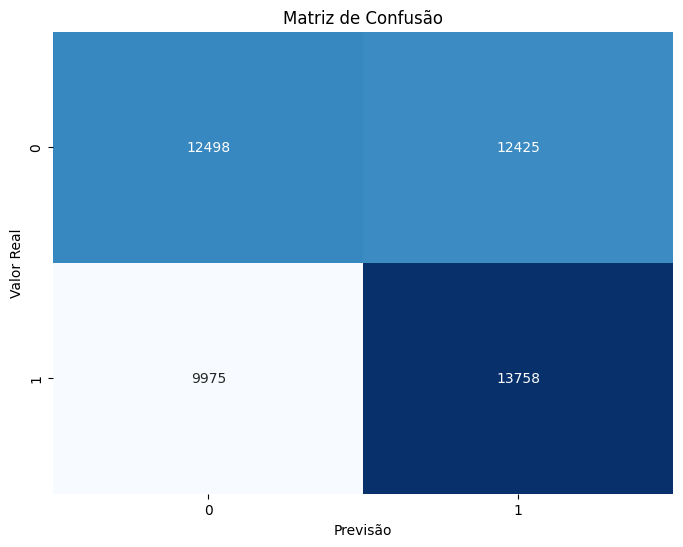

In [18]:
x_independents = dataset[['DuracaoDoutorado',
                    'ExclusividadeDoutorado',
                    'Publicacoes',
                    'IdadeAcademica',
                    'HistoricoInternacional']]
y_dependent = dataset['Genero']

logistic_regression(x_independents, y_dependent)

## Estimando exclusividade de área no doutorado

Estimar ExclusividadeDoutorado com base nas seguintes variáveis disponíveis:
* DuracaoDoutorado
* Genero
* Publicacoes
* IdadeAcademica
* HistoricoInternacional

Balanced: False
ExclusividadeDoutorado
1.0    73714
0.0    47926
Name: count, dtype: int64
Acurácia: 0.6171489641565274
Report:
               precision    recall  f1-score   support

         0.0       0.81      0.03      0.07     19131
         1.0       0.61      0.99      0.76     29525

    accuracy                           0.62     48656
   macro avg       0.71      0.51      0.41     48656
weighted avg       0.69      0.62      0.49     48656



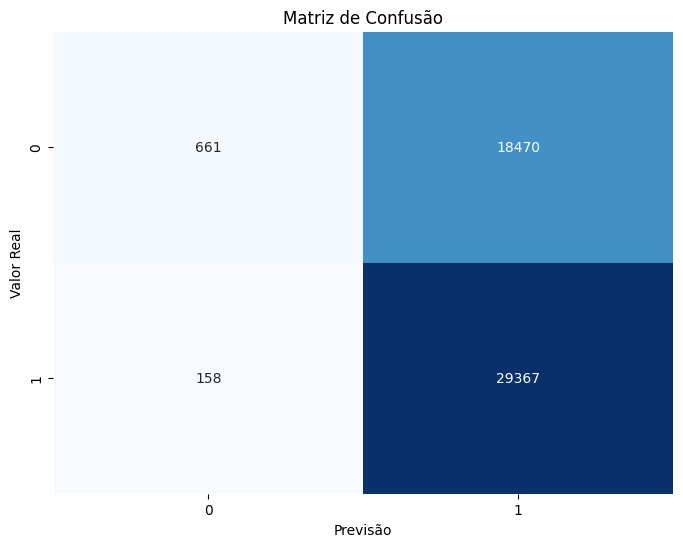

Balanced: True
ExclusividadeDoutorado
1.0    73714
0.0    47926
Name: count, dtype: int64
Acurácia: 0.5293694508385399
Report:
               precision    recall  f1-score   support

         0.0       0.43      0.65      0.52     19131
         1.0       0.67      0.45      0.54     29525

    accuracy                           0.53     48656
   macro avg       0.55      0.55      0.53     48656
weighted avg       0.58      0.53      0.53     48656



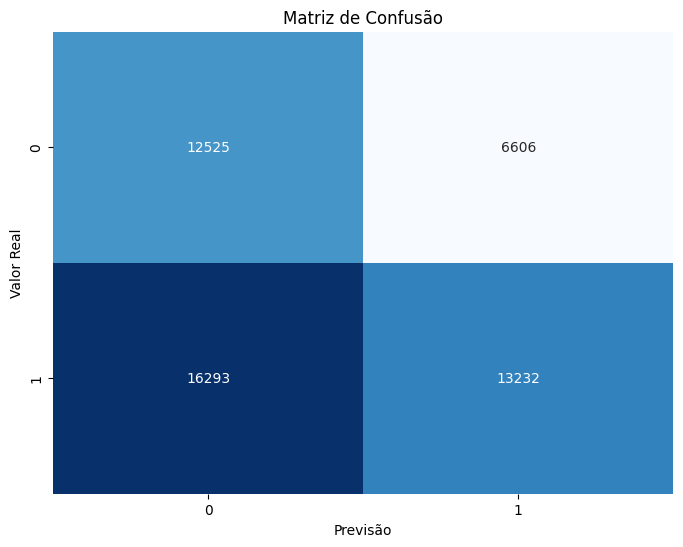

In [19]:
x_independents = dataset[['DuracaoDoutorado',
             'Genero',
             'Publicacoes',
             'IdadeAcademica',
             'HistoricoInternacional']]
y_dependent = dataset['ExclusividadeDoutorado']

logistic_regression(x_independents, y_dependent)
logistic_regression(x_independents, y_dependent, balanced=True)